## Setup

This section downloads, installs and imports some Python libraries we are using in this notebook.

In [0]:
!pip3 install tensorflow>=2.0 gpustat -Uq

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
print("TensorFlow version:", tensorflow.__version__)

import tensorflow.compat.v2 as tf
from tensorflow.keras import layers

from random import random, randint
from IPython.display import clear_output

TensorFlow version: 2.0.0


# Linear Regression

## Generate synthetic data

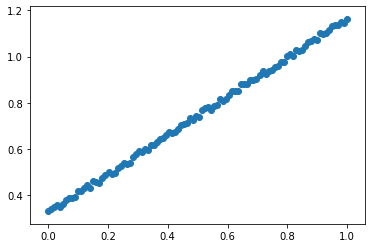

In [3]:
A = random()
C = random()

X = np.linspace(0.0, 1.0, num=100, endpoint=True)
noise = np.random.rand(100)/40
Y = A * X + C + noise

plt.scatter(X, Y)
plt.show()

## Fit a Linear Regression Model

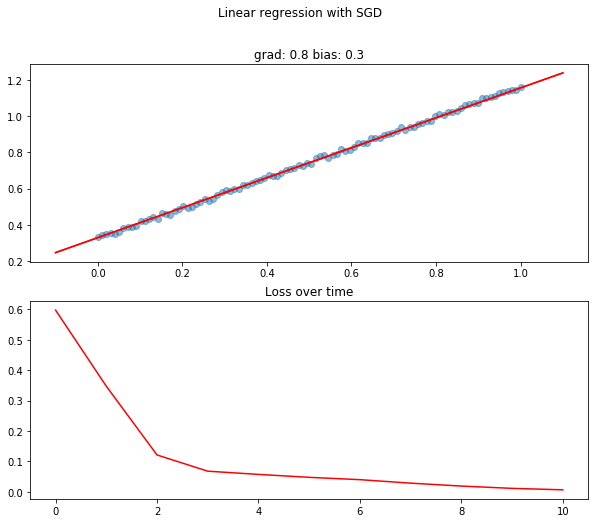

In [4]:
model = tf.keras.models.Sequential([
    layers.Dense(1),
])

model.compile(loss="mae",
              optimizer="sgd")

reg_X = np.linspace(-0.1, 1.1, num=100, endpoint=True)

loss_list = []

loss = model.evaluate(X, Y, batch_size=100, verbose=0)
loss_list.append(loss)

while loss > 0.007:
    clear_output(wait=True)
    model.fit(X, Y, epochs=1, batch_size=5, verbose=0)
    loss = model.evaluate(X, Y, batch_size=25, verbose=0)
    loss_list.append(loss)

    weights = model.layers[0].get_weights()
    gradient = weights[0][0][0]
    bias = weights[1][0]
    
    reg_Y = gradient * reg_X + bias

    fig, axs = plt.subplots(2, figsize=(10,8))
    fig.suptitle("Linear regression with SGD")
    axs[0].plot(reg_X, reg_Y, color="r")
    axs[0].plot(reg_X, reg_Y, color="r")
    axs[0].scatter(X, Y, alpha=0.5)
    title = "grad: " + str(round(gradient, 1)) + " bias: " + str(round(bias, 1))
    axs[0].set_title(title)
    axs[1].plot(loss_list, color="r")
    axs[1].set_title("Loss over time")
    plt.show()